In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

C:\Users\tegar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tegar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\tegar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\tegar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df

,date,gold,silver,USD_EUR,USD_CNY,oil,SP_500,inflation
0,01/01/1986,352.9,6.113,1.0991,3.2095,18.83,211.78,3.9
1,02/01/1986,342.8,5.705,1.0263,3.2159,13.26,226.92,3.1
2,03/01/1986,334.8,5.198,1.0714,3.2288,10.42,238.90,2.3
3,04/01/1986,349.7,5.190,1.0062,3.1999,13.34,235.52,1.6
4,05/01/1986,347.1,5.197,1.0778,3.2191,14.30,247.35,1.5
...,...,...,...,...,...,...,...,...
403,08/01/2019,1529.4,18.293,0.9097,7.1543,55.10,2926.46,1.7
404,09/01/2019,1479.6,16.998,0.9173,7.1477,54.07,2976.74,1.7
405,10/01/2019,1521.8,18.124,0.8965,7.0379,54.18,3037.56,1.8
406,11/01/2019,1478.1,17.060,0.9075,7.0308,55.17,3140.98,2.1


In [4]:
df.head()

,date,gold,silver,USD_EUR,USD_CNY,oil,SP_500,inflation
0,01/01/1986,352.9,6.113,1.0991,3.2095,18.83,211.78,3.9
1,02/01/1986,342.8,5.705,1.0263,3.2159,13.26,226.92,3.1
2,03/01/1986,334.8,5.198,1.0714,3.2288,10.42,238.90,2.3
3,04/01/1986,349.7,5.190,1.0062,3.1999,13.34,235.52,1.6
4,05/01/1986,347.1,5.197,1.0778,3.2191,14.30,247.35,1.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       408 non-null    object 
 1   gold       408 non-null    float64
 2   silver     408 non-null    float64
 3   USD_EUR    408 non-null    float64
 4   USD_CNY    408 non-null    float64
 5   oil        408 non-null    float64
 6   SP_500     408 non-null    float64
 7   inflation  408 non-null    float64
dtypes: float64(7), object(1)
memory usage: 25.6+ KB


In [6]:
df.describe()

,gold,silver,USD_EUR,USD_CNY,oil,SP_500,inflation
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,705.611275,10.990860,0.844646,6.770807,44.380221,1154.083578,2.589706
std,454.707529,8.209463,0.109913,1.525094,29.374761,710.653757,1.320614
min,257.000000,3.600000,0.634100,3.199900,10.420000,211.780000,-2.100000
25%,359.400000,5.063500,0.767275,6.119825,19.790000,465.727500,1.700000
50%,419.650000,6.527500,0.826900,6.828050,30.940000,1128.205000,2.600000
75%,1183.575000,16.198500,0.896800,8.277100,65.032500,1429.757500,3.300000
max,1830.300000,48.599000,1.182100,8.708000,140.000000,3230.780000,6.300000


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

date
['01/01/1986' '02/01/1986' '03/01/1986' '04/01/1986' '05/01/1986'
 '06/01/1986' '07/01/1986' '08/01/1986' '09/01/1986' '10/01/1986'
 '11/01/1986' '12/01/1986' '01/01/1987' '02/01/1987' '03/01/1987'
 '04/01/1987' '05/01/1987' '06/01/1987' '07/01/1987' '08/01/1987'
 '09/01/1987' '10/01/1987' '11/01/1987' '12/01/1987' '01/01/1988'
 '02/01/1988' '03/01/1988' '04/01/1988' '05/01/1988' '06/01/1988'
 '07/01/1988' '08/01/1988' '09/01/1988' '10/01/1988' '11/01/1988'
 '12/01/1988' '01/01/1989' '02/01/1989' '03/01/1989' '04/01/1989'
 '05/01/1989' '06/01/1989' '07/01/1989' '08/01/1989' '09/01/1989'
 '10/01/1989' '11/01/1989' '12/01/1989' '01/01/1990' '02/01/1990'
 '03/01/1990' '04/01/1990' '05/01/1990' '06/01/1990' '07/01/1990'
 '08/01/1990' '09/01/1990' '10/01/1990' '11/01/1990' '12/01/1990'
 '01/01/1991' '02/01/1991' '03/01/1991' '04/01/1991' '05/01/1991'
 '06/01/1991' '07/01/1991' '08/01/1991' '09/01/1991' '10/01/1991'
 '11/01/1991' '12/01/1991' '01/01/1992' '02/01/1992' '03/01/1992'
 '04/

In [8]:
#mencari missing values
features_na = [features for features in df.columns if df[features].isnull().sum()>0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(),4),'% missing values')
    
else:
    print('tidak ada missing value')

tidak ada missing value


In [9]:
for column in df.columns:
    print(column,df[column].nunique())

date 408
gold 393
silver 394
USD_EUR 382
USD_CNY 293
oil 387
SP_500 405
inflation 65


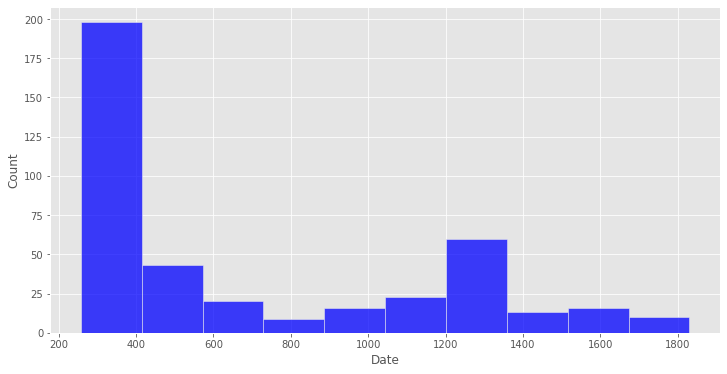

In [10]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.histplot(df['gold'],color='Blue')
plt.xlabel('Date')
plt.show()

In [11]:
correlation=df.corr()

<AxesSubplot:>

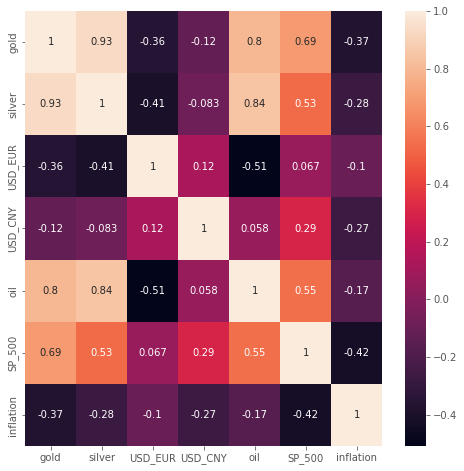

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),color = "k", annot=True)

In [13]:
print(correlation)

               gold    silver   USD_EUR   USD_CNY       oil    SP_500  \
gold       1.000000  0.931514 -0.359872 -0.124594  0.798599  0.688812   
silver     0.931514  1.000000 -0.406067 -0.082581  0.842293  0.531198   
USD_EUR   -0.359872 -0.406067  1.000000  0.117275 -0.508834  0.066665   
USD_CNY   -0.124594 -0.082581  0.117275  1.000000  0.057908  0.294383   
oil        0.798599  0.842293 -0.508834  0.057908  1.000000  0.545326   
SP_500     0.688812  0.531198  0.066665  0.294383  0.545326  1.000000   
inflation -0.370517 -0.276790 -0.102155 -0.267148 -0.168379 -0.420920   

           inflation  
gold       -0.370517  
silver     -0.276790  
USD_EUR    -0.102155  
USD_CNY    -0.267148  
oil        -0.168379  
SP_500     -0.420920  
inflation   1.000000  


In [14]:
X = df[
    [
        'silver',
        'USD_EUR',
        'USD_CNY',
        'oil',
        'SP_500',
        'inflation']
]
Y = df['gold']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [16]:
import shap
shap.initjs()

In [17]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

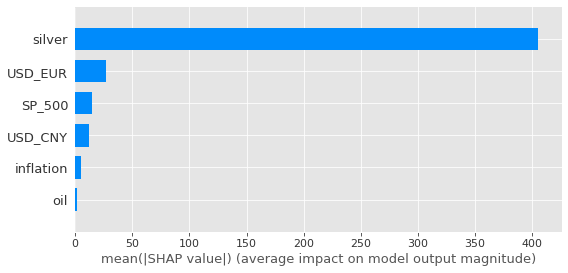

In [18]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [19]:
def abs_shap(df_shap, df):
    # membuat copy dari data agar data tidak berantakan
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # menentukan korelasi untuk plot dengan warna yg berbeda
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i], df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list), pd.Series(corr_list)], axis=1).fillna(0)
    # membuat dataframe. kolom 1 adalah fitur dan kolom 2 adalah korelasi
    corr_df.columns  = ['Variable', 'Corr']
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'red', 'blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k = pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable', 'SHAP_abs']
    k2 = k.merge(corr_df, left_on = 'Variable', right_on='Variable', how='inner')
    k2 = k2.sort_values(by='SHAP_abs', ascending=True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable', y='SHAP_abs', color=colorlist, figsize=(5, 6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

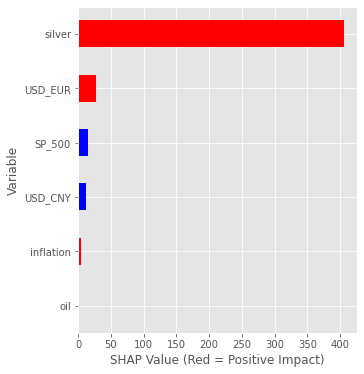

In [20]:
abs_shap(shap_values, X_train) 

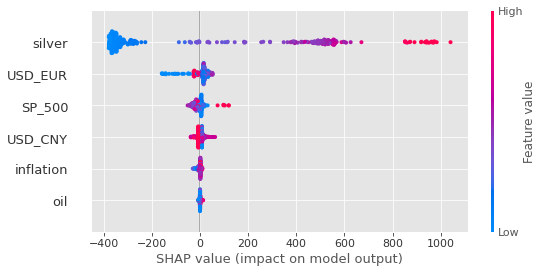

In [21]:
shap.summary_plot(shap_values, X_train)

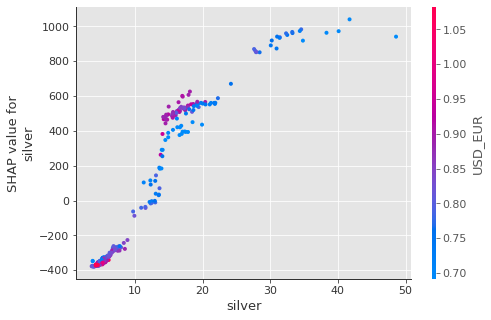

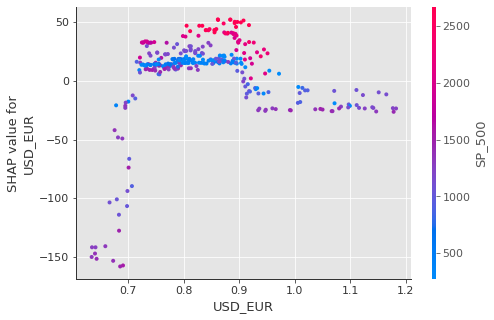

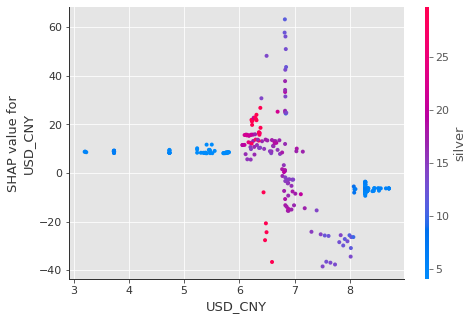

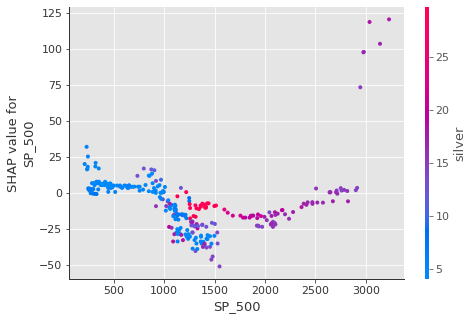

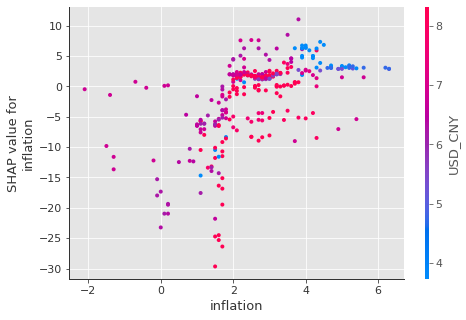

In [22]:
shap.dependence_plot("silver", shap_values, X_train)
shap.dependence_plot("USD_EUR", shap_values, X_train)
shap.dependence_plot("USD_CNY", shap_values, X_train)
shap.dependence_plot("SP_500", shap_values, X_train)
shap.dependence_plot("inflation", shap_values, X_train)

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Random Forest

<AxesSubplot:xlabel='gold', ylabel='Density'>

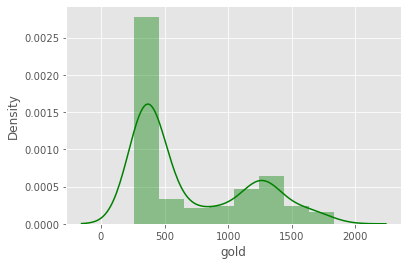

In [24]:
sns.distplot(df['gold'],color='green')

In [25]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[ 392.793 1537.554 1109.565 1627.     303.466  955.579  278.724  314.759
  368.034 1276.977 1243.388  385.224 1672.262 1290.789  269.995  782.482
  423.131 1175.002 1607.561  349.702  376.425  295.281 1172.85   400.58
  375.737  388.151 1209.343  893.137  277.207 1184.295 1664.723  956.11
  431.05   627.881  469.6    302.434  392.456  381.989  323.797  366.22
  348.987 1220.529 1427.069  386.973  963.97   388.016  453.589 1251.293
  350.269  365.491  271.671  325.363  368.09  1657.785  279.338  421.031
  349.694  408.546  381.06   293.354  378.522  357.84  1208.911 1425.754
 1664.845  470.241  335.67  1212.654  390.916 1624.377  281.978  656.835
  393.098 1491.829 1369.754 1632.241  320.186 1293.373  474.357  383.253
  393.173 1211.115]


In [27]:
from sklearn import metrics
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"R squared error: {error_score} ")

R squared error: 0.9913457102521747 


In [28]:
Y_test = list(Y_test)

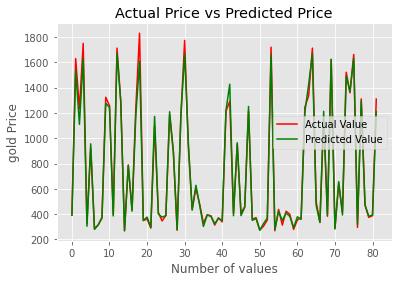

In [29]:
plt.plot(Y_test, color='Red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('gold Price')
plt.legend()
plt.show()